# Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('All libraries imported')

All libraries imported


# Set up default plotting parameters

In [2]:

%matplotlib inline
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})
sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

# Import datasets and assign to variables

In [3]:
dataset = pd.read_csv('train_data.csv')
dataset2 = pd.read_csv('test_data.csv')
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [4]:
dataset.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
dataset.shape

(7000, 13)

# Check the first 5 of the dataset

In [6]:
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


# Check for missing values

In [7]:
dataset.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
dataset.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1.569078e+07,649.424000,38.932857,5.008143,77006.866360,1.525857,0.709286,0.514429,99783.685516,0.201429
std,7.191100e+04,97.478815,10.467815,2.891734,62392.609703,0.582318,0.454124,0.499827,57358.455381,0.401096
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562847e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50957.302500,0.000000
50%,1.569053e+07,651.000000,37.000000,5.000000,97529.180000,1.000000,1.000000,1.000000,99594.475000,0.000000
75%,1.575333e+07,716.000000,44.000000,7.000000,127942.495000,2.000000,1.000000,1.000000,149462.720000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199953.330000,1.000000


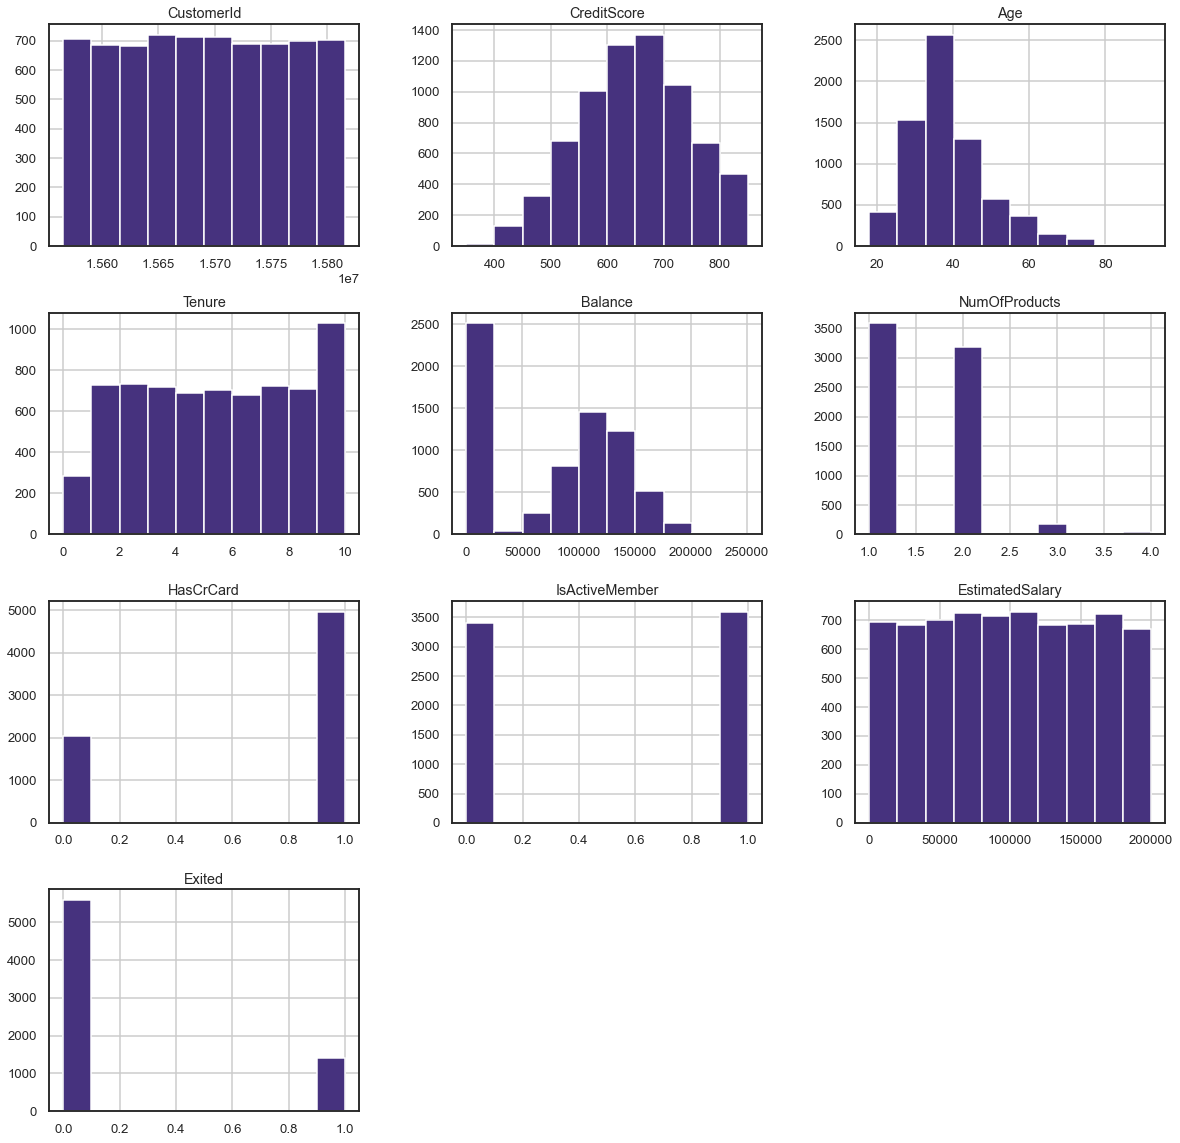

In [9]:
dataset.hist(figsize=(20,20))
plt.show()

### From the above visualization, we can understand that 'Age' , 'NumOfProducts', 'Active Member', 'Balance' columns are capable of determining whether a customer would be exited or not


#### Creditscore, tenure, balance and EstimatedSalary do not have outliers


# number of unique observations per column

In [10]:

dataset.nunique()

CustomerId         7000
Surname            2424
CreditScore         455
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            4490
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    6999
Exited                2
dtype: int64

## Observe that we have 11 features for 7000 clients. 

# eliminating unneccesary columns from the dataset

In [11]:

df = dataset.drop( ['Surname'], axis=1, inplace = True)


In [12]:
df = dataset2.drop( ['Surname'], axis=1, inplace = True)

#### The values should be 0 and 1 not words, so it has to be encoded

In [13]:
# Encoding the categorical variables
from sklearn import preprocessing
#creating label encoader
le = preprocessing.LabelEncoder()

In [14]:
#converting string lables into numbers
dataset['Geography']=le.fit_transform(dataset['Geography'])
dataset['Gender']=le.fit_transform(dataset['Gender'])

In [15]:
#converting string lables into numbers
dataset2['Geography']=le.fit_transform(dataset2['Geography'])
dataset2['Gender']=le.fit_transform(dataset2['Gender'])

#### hot encoding

In [16]:
dataset = pd.get_dummies(dataset, columns =["Geography", "Gender"], drop_first = True)

In [17]:
dataset.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
0,15804610,601,41,1,0.00,2,0,1,160607.06,0,0,0,0
1,15574523,576,39,1,0.00,2,1,1,68814.23,0,0,0,1
2,15587443,728,69,1,0.00,2,1,1,131804.86,0,0,0,0
3,15768682,640,39,3,0.00,1,1,1,105997.25,0,0,1,1
4,15569682,768,37,9,108308.11,1,1,0,41788.25,1,1,0,1


In [18]:
dataset.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
CustomerId,1.000000,0.008499,0.009929,-0.018993,-0.021439,0.011442,-0.019029,-0.011828,0.032816,-0.007060,-0.009975,0.008892,-0.007481
CreditScore,0.008499,1.000000,-0.002511,-0.006013,0.002181,0.008048,-0.008505,0.026724,-0.007756,-0.032201,-0.002036,-0.003275,-0.006991
Age,0.009929,-0.002511,1.000000,0.001982,0.019424,-0.030046,-0.014927,0.085195,0.009270,0.288732,0.042065,-0.011747,-0.024932
Tenure,-0.018993,-0.006013,0.001982,1.000000,0.001221,-0.003052,0.025304,-0.025239,0.007210,-0.009668,-0.001857,0.003546,0.011091
Balance,-0.021439,0.002181,0.019424,0.001221,1.000000,-0.303379,-0.009317,-0.010813,0.018277,0.111493,0.396268,-0.131095,0.007610
NumOfProducts,0.011442,0.008048,-0.030046,-0.003052,-0.303379,1.000000,0.009249,0.008045,0.015463,-0.040043,-0.003328,0.003895,-0.012755
HasCrCard,-0.019029,-0.008505,-0.014927,0.025304,-0.009317,0.009249,1.000000,-0.020230,-0.010966,-0.008701,0.008858,-0.012360,0.021000
IsActiveMember,-0.011828,0.026724,0.085195,-0.025239,-0.010813,0.008045,-0.020230,1.000000,-0.018574,-0.167725,-0.026262,0.014973,0.025304
EstimatedSalary,0.032816,-0.007756,0.009270,0.007210,0.018277,0.015463,-0.010966,-0.018574,1.000000,0.016426,0.017206,-0.011224,-0.003190
Exited,-0.007060,-0.032201,0.288732,-0.009668,0.111493,-0.040043,-0.008701,-0.167725,0.016426,1.000000,0.170520,-0.054422,-0.101712


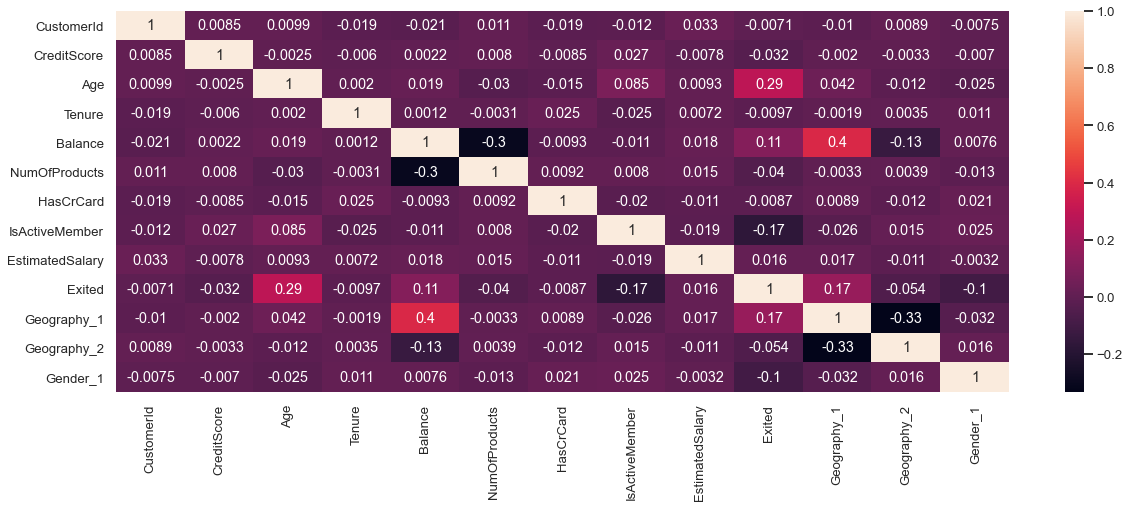

In [19]:
sns.heatmap(dataset.corr(), annot=True)
plt.show()

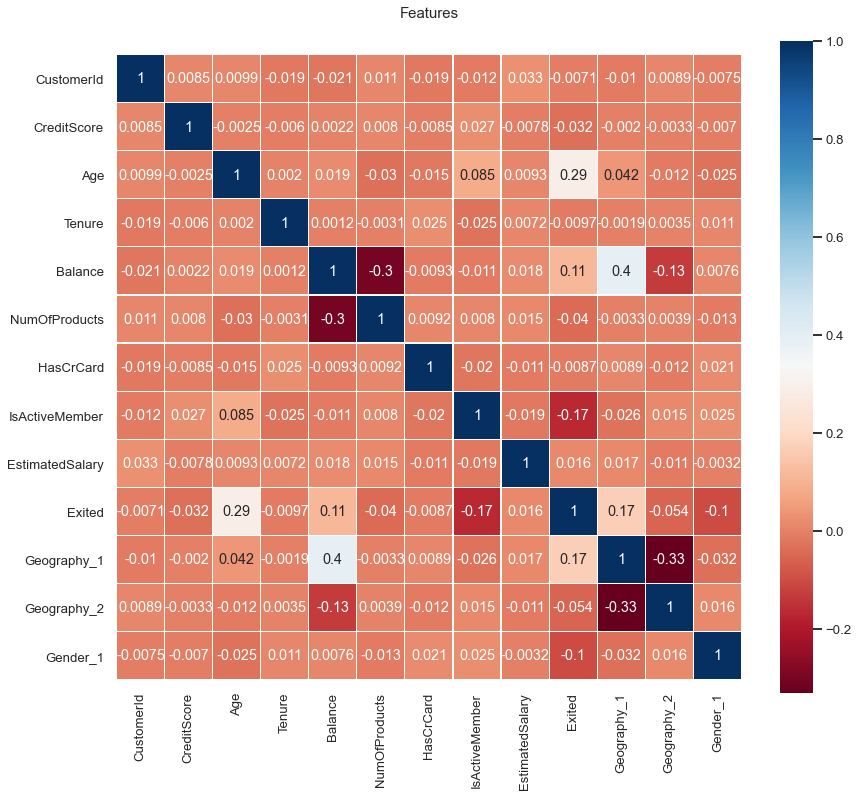

In [20]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Features', y=1.05, size=15)
sns.heatmap(dataset.corr(),linewidths=0.1,vmax=1.0,
 square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

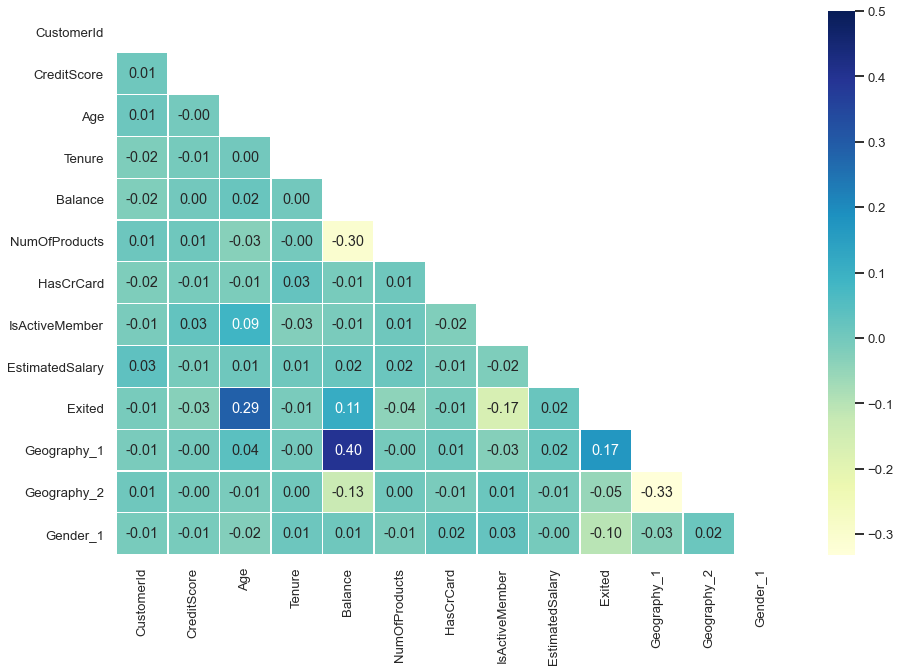

In [21]:
# Calculate correlations
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
 vmax=.5,
 mask=mask,
 annot=True, fmt='.2f',
 linewidths=.2, cmap="YlGnBu")
plt.show()

In [22]:
# Find correlations with the target and sort
correlations = dataset.corr()['Exited'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 EstimatedSalary    0.016426
Balance            0.111493
Geography_1        0.170520
Age                0.288732
Exited             1.000000
Name: Exited, dtype: float64

Most Negative Correlations: 
 IsActiveMember   -0.167725
Gender_1         -0.101712
Geography_2      -0.054422
NumOfProducts    -0.040043
CreditScore      -0.032201
Name: Exited, dtype: float64


### The strongest positive correlations with the target features are: EstimatedSalary, Balance, Geography_1 , Age .
### The strongest negative correlations with the target features are: IsActiveMember, Gender_1, Geography_2, NumOfProducts  *, and *CreditScore . 
### Several features (ie columns) are redundant for our analysis, namely: Surname

In [23]:
X_train = dataset[['Age', 'IsActiveMember','Balance', 'NumOfProducts']].values
Y_train = dataset['Exited'].values

In [24]:


theFeatures = dataset[['Age', 'IsActiveMember','Balance', 'NumOfProducts']]
theTarget = dataset['Exited']


#TestData = dataset2[['Age', 'IsActiveMember', 'Balance', 'NumOfProducts']]



### This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

[0.32915577 0.04313084 0.46128559 0.16642781]


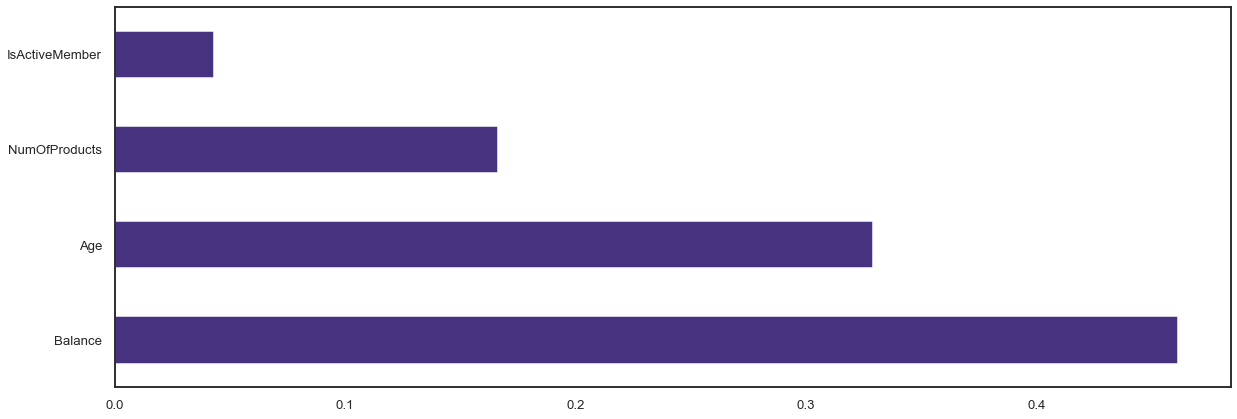

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(theFeatures,theTarget)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=theFeatures.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

In [26]:
X_test = dataset2[['Age', 'IsActiveMember', 'Balance', 'NumOfProducts']].values


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
regressor = LogisticRegression()

In [29]:
regressor.fit(X_train,Y_train)

LogisticRegression()

In [30]:
Y_pred = regressor.predict(X_test
# regressor.score(X_train, Y_train)

In [31]:
dic = {'CustomerId' : dataset2['CustomerId'], 'Exited' :Y_pred}

In [32]:
Result = pd.DataFrame(dic)
Result.head()

,CustomerId,Exited
0,15642544,0
1,15779492,0
2,15815271,0
3,15582591,0
4,15595937,0


In [33]:
Result.to_csv('result.csv', index=False)

In [34]:
dataset.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_1', 'Geography_2', 'Gender_1'],
      dtype='object')

# Splitting the dataset

In [35]:

from sklearn.model_selection import train_test_split

In [36]:
# from imblearn.over_sampling import SMOTE

# smk = SMOTE()

In [37]:
theFeatures_train,theFeatures_test,theTarget_train,theTarget_test = train_test_split(theFeatures,theTarget, test_size = 0.2, random_state = 0)

In [38]:
# theFeatures_train,theTarget_train = smk.fit_resample(theFeatures_train,theTarget_train)

# theFeatures_test, theTarget_test =  smk.fit_resample(theFeatures_test,theTarget_test)

In [39]:
print(theFeatures_train.shape,theFeatures_test.shape,theTarget_train.shape, theTarget_test.shape  )

(5600, 4) (1400, 4) (5600,) (1400,)


In [40]:
# print(theFeatures_train.shape,theFeatures_test.shape,theTarget_train.shape, theTarget_test.shape  )


In [42]:
theFeatures_train


6137    0
4778    0
3149    0
4638    0
4110    0
       ..
4931    0
3264    1
1653    0
2607    0
2732    0
Name: Exited, Length: 5600, dtype: int64

# Fitting the Decision tree classifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()
theModel = classifier.fit(theFeatures_train, theTarget_train)

In [ ]:
#Prediction
target_prediction = theModel.predict(X_test)
#classifier.score(theTarget_test, target_prediction)

In [ ]:
dic2 = {'CustomerId' : dataset2['CustomerId'], 'Exited' :target_prediction}

In [ ]:
Result2 = pd.DataFrame(dic2)
Result2.head()

# Fitting the RandomForest classifier

In [ ]:
Result2.to_csv('result2.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier2 = RandomForestClassifier(n_estimators=200)
theModel2 = classifier2.fit(theFeatures_train, theTarget_train)

In [ ]:
target_prediction2 = theModel2.predict(X_test)

In [ ]:
dic3 = {'CustomerId' : dataset2['CustomerId'], 'Exited' :target_prediction2}

In [ ]:
Result3 = pd.DataFrame(dic3)
Result3.head()

In [ ]:
Result3.to_csv('result3.csv', index=False)

# Fitting the SVC Classifier

In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel='poly', random_state=0)
theModel3 = classifier3.fit(theFeatures_train, theTarget_train)

In [ ]:
target_prediction3 = theModel3.predict(X_test)
# classifier.score(theTarget_test, target_prediction3)

In [ ]:
dic4 = {'CustomerId' : dataset2['CustomerId'], 'Exited' :target_prediction3}

In [ ]:
Result4 = pd.DataFrame(dic4)
Result4.head()

In [ ]:
Result4.to_csv('result4.csv', index=False)

# Fitting the GradientBoosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier4 = GradientBoostingClassifier()
theModel4 = classifier4.fit(theFeatures_train, theTarget_train)

In [ ]:
target_prediction4 = theModel4.predict(X_test)
# classifier.score(theTarget_test, target_prediction4)

In [ ]:
dic5 = {'CustomerId' : dataset2['CustomerId'], 'Exited' :target_prediction4}

In [ ]:
Result5 = pd.DataFrame(dic5)
Result5.head()

In [ ]:
Result5.to_csv('result5.csv', index=False)